In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

c:\Users\nixon\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start='2010-01-01'
end='2022-12-31'
symbol='IRFC.NS'
df=yf.download(symbol,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
csv_file_path = 'IRFC_StockPrices.csv'

In [4]:
df.to_csv(csv_file_path)

In [5]:
print(f'Data saved to: {csv_file_path}')

Data saved to: IRFC_StockPrices.csv


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363667,381938573
2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622101,72044464
2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442
2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889875,45816269
2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 477 entries, 2021-01-29 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       477 non-null    float64
 1   High       477 non-null    float64
 2   Low        477 non-null    float64
 3   Close      477 non-null    float64
 4   Adj Close  477 non-null    float64
 5   Volume     477 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.1 KB


<AxesSubplot: xlabel='Date'>

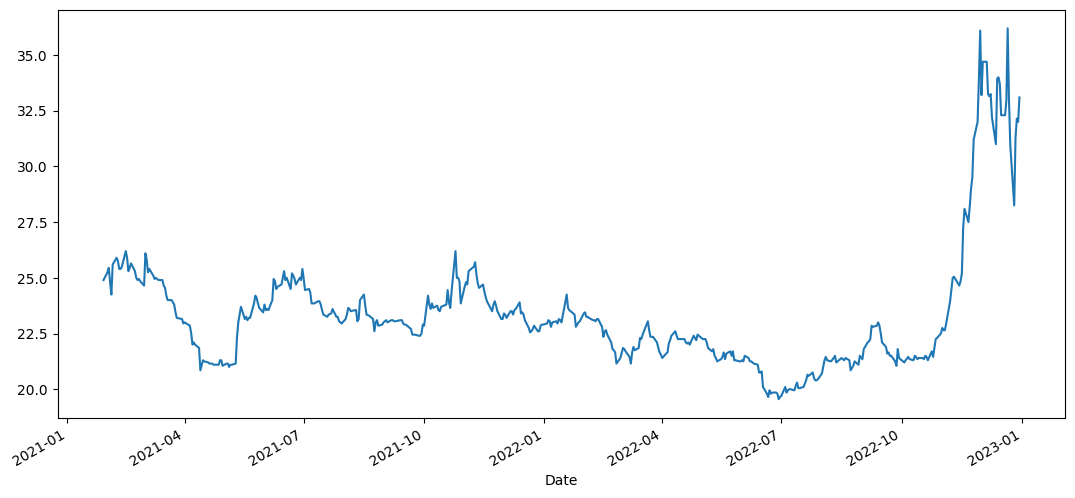

In [8]:
df['Open'].plot(figsize=(13,6))

In [9]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08,25.164286,25.642857,24.714286,25.100000,21.622098,1.013805e+08
2021-02-09,25.285714,25.642857,24.835714,25.171429,21.683629,5.042412e+07
2021-02-10,25.307143,25.700000,24.850000,25.214286,21.720547,4.486521e+07


<AxesSubplot: xlabel='Date'>

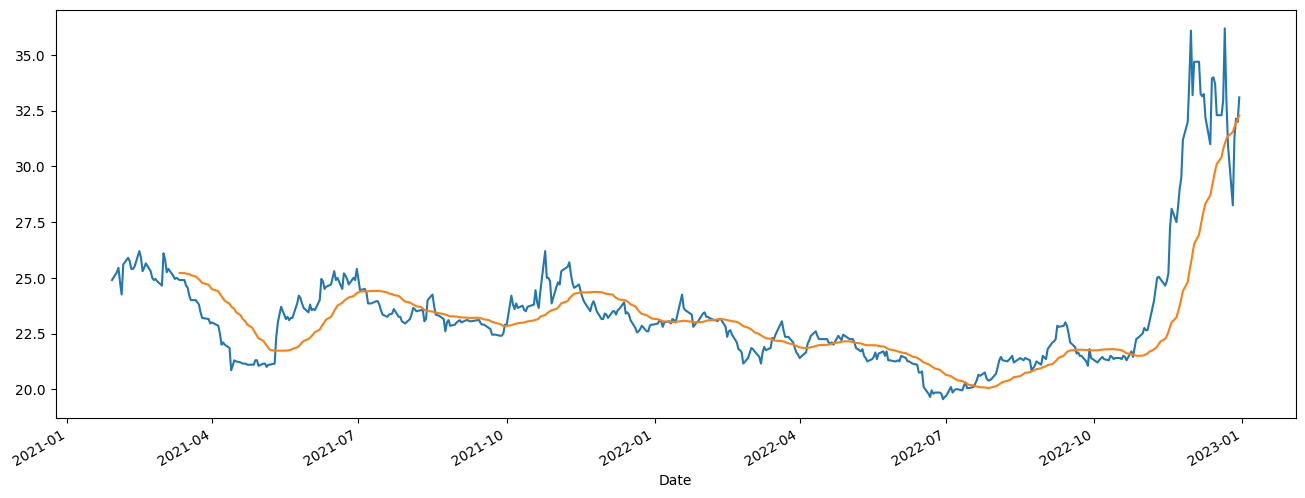

In [10]:
df['Open'].plot(figsize=(16,6))
df['Close'].rolling(30).mean().plot()

<AxesSubplot: xlabel='Date'>

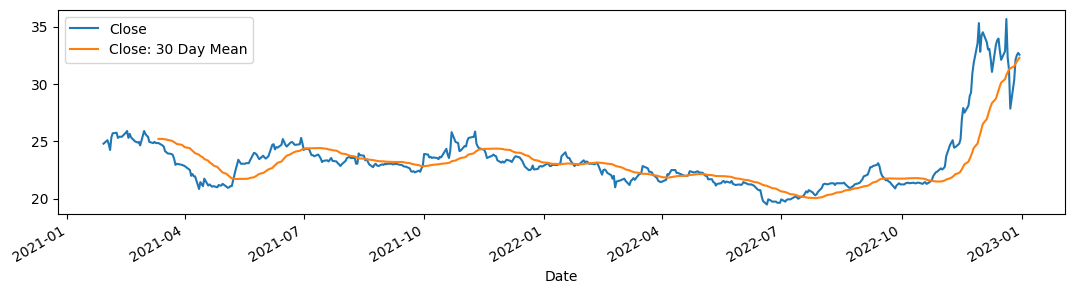

In [11]:
df['Close: 30 Day Mean']=df['Close'].rolling(30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(13,3))


<AxesSubplot: xlabel='Date'>

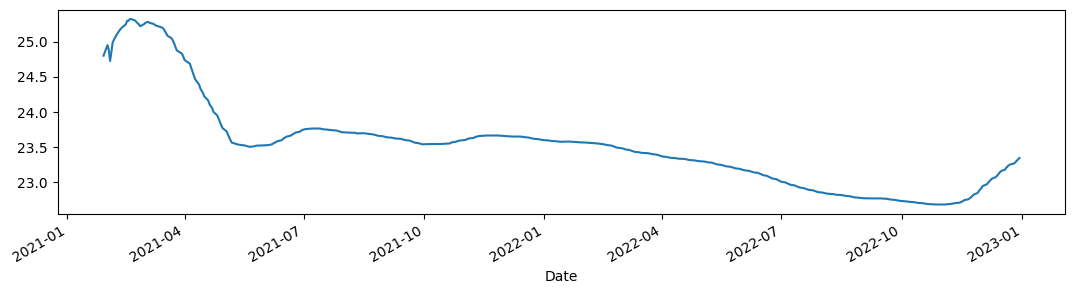

In [12]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(13,3))

In [13]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

df.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [14]:
df_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
df_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_scaled=sc.fit_transform(df_training)
data_tesing_scaled=sc.fit_transform(df_testing)

In [17]:
# data_training_scaled

In [18]:
data_training_scaled.shape

(333, 1)

In [19]:
x_train=[]
y_train=[]
for i in range(60,data_training_scaled.shape[0]):
    x_train.append(data_training_scaled[i-60:i,0])
    y_train.append(data_training_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
import tensorflow as tf
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
regressor=Sequential()

In [22]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=80))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

In [23]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(x_train,y_train,epochs=52,batch_size=32)

Epoch 1/52
9/9 [==============================] - 7s 99ms/step - loss: 0.0942
Epoch 2/52
9/9 [==============================] - 1s 98ms/step - loss: 0.0496
Epoch 3/52
9/9 [==============================] - 1s 92ms/step - loss: 0.0335
Epoch 4/52
9/9 [==============================] - 1s 92ms/step - loss: 0.0283
Epoch 5/52
9/9 [==============================] - 1s 93ms/step - loss: 0.0321
Epoch 6/52
9/9 [==============================] - 1s 88ms/step - loss: 0.0257
Epoch 7/52
9/9 [==============================] - 1s 87ms/step - loss: 0.0238
Epoch 8/52
9/9 [==============================] - 1s 89ms/step - loss: 0.0217
Epoch 9/52
9/9 [==============================] - 1s 90ms/step - loss: 0.0192
Epoch 10/52
9/9 [==============================] - 1s 88ms/step - loss: 0.0190
Epoch 11/52
9/9 [==============================] - 1s 90ms/step - loss: 0.0206
Epoch 12/52
9/9 [==============================] - 1s 88ms/step - loss: 0.0175
Epoch 13/52
9/9 [==============================] - 1s 86ms/st

In [24]:
regressor.save('Model')

INFO:tensorflow:Assets written to: Model\assets


INFO:tensorflow:Assets written to: Model\assets


In [25]:
df_testing.head()

,Close
Date,
2022-06-06,21.250000
2022-06-07,21.250000
2022-06-08,21.250000
2022-06-09,21.200001
2022-06-10,21.150000


In [26]:
df_training.head()

,Close
Date,
2021-01-29,24.799999
2021-02-01,25.100000
2021-02-02,24.750000
2021-02-03,24.250000
2021-02-04,25.350000


In [27]:
df_training.tail()

,Close
Date,
2022-05-30,21.250000
2022-05-31,21.200001
2022-06-01,21.250000
2022-06-02,21.450001
2022-06-03,21.400000


In [28]:
past_100_days=df_training.tail(100)

In [29]:
final_df=past_100_days.append(df_testing,ignore_index=True)
final_df

C:\Users\nixon\AppData\Local\Temp\ipykernel_17576\2779007748.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(df_testing,ignore_index=True)


,Close
0,22.950001
1,22.950001
2,22.950001
3,23.049999
4,23.000000
...,...
239,30.350000
240,32.099998
241,32.500000
242,32.700001


In [30]:
input_data=sc.fit_transform(final_df)
# input_data

In [31]:
input_data.shape

(244, 1)

In [32]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-60:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(144, 60, 1)
(144,)


In [35]:
y_predicted=regressor.predict(x_test)

5/5 [==============================] - 1s 25ms/step


In [36]:
y_predicted.shape

(144, 1)

In [37]:
y_test.shape

(144,)

In [38]:
y_predicted_original_scale =sc.inverse_transform(y_predicted)
y_test_original_scale = sc.inverse_transform(y_test.reshape(-1, 1))

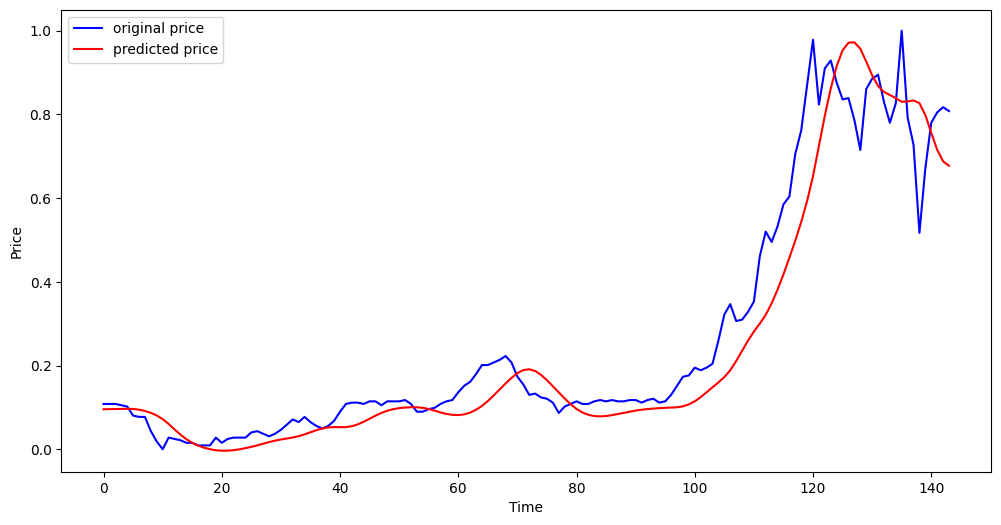

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()